<a href="https://www.kaggle.com/code/lalit7881/97-47-accurate-porsche-stock-prediction-model?scriptVersionId=300569476" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/sanaijlalshahrukh/porsche-ag-historical-stock-prices-2022-2026/porsche_stock_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/datasets/sanaijlalshahrukh/porsche-ag-historical-stock-prices-2022-2026/porsche_stock_data.csv")

In [3]:
df.head()

,date,open,high,low,close,volume
0,2022-09-30,75.617410,76.164700,75.252548,75.252548,5079137
1,2022-10-03,75.252548,75.453222,73.884320,74.614044,2403446
2,2022-10-04,75.434974,79.795067,74.796470,79.795067,1599630
3,2022-10-05,79.448447,81.765314,78.919397,80.196411,1321304
4,2022-10-06,81.820036,85.468644,81.491661,82.750435,2217065


In [4]:
df.tail()

,date,open,high,low,close,volume
861,2026-02-19,42.000000,42.400002,41.130001,41.700001,402139
862,2026-02-20,41.400002,43.049999,41.400002,42.340000,893498
863,2026-02-23,42.169998,42.360001,40.959999,41.169998,761838
864,2026-02-24,41.200001,42.230000,41.180000,41.549999,712492
865,2026-02-25,41.490002,41.849998,41.029999,41.320000,411145


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    866 non-null    object 
 1   open    866 non-null    float64
 2   high    866 non-null    float64
 3   low     866 non-null    float64
 4   close   866 non-null    float64
 5   volume  866 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 40.7+ KB


In [6]:
df.describe()

,open,high,low,close,volume
count,866.000000,866.000000,866.000000,866.000000,8.660000e+02
mean,70.638938,71.434490,69.723691,70.532747,5.674776e+05
std,21.944210,22.131165,21.628439,21.899780,5.673197e+05
min,39.120645,40.029999,38.398831,39.529999,0.000000e+00
25%,46.747500,47.462501,46.304999,46.809999,3.100342e+05
50%,69.151123,69.721450,67.679951,68.686703,4.584455e+05
75%,88.536388,90.211843,86.928254,88.216194,6.722385e+05
max,109.868710,110.187969,108.728520,109.777496,9.901667e+06


In [7]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [10]:
df.shape

(866, 6)

In [11]:
df.nunique()

date      866
open      826
high      831
low       822
close     710
volume    809
dtype: int64

In [12]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [13]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
sns.set(style="whitegrid")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

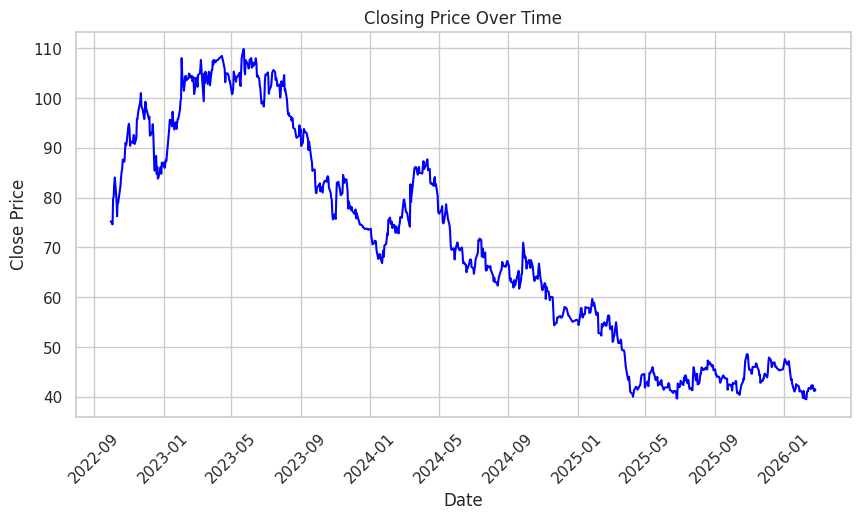

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['close'], color='blue')
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()

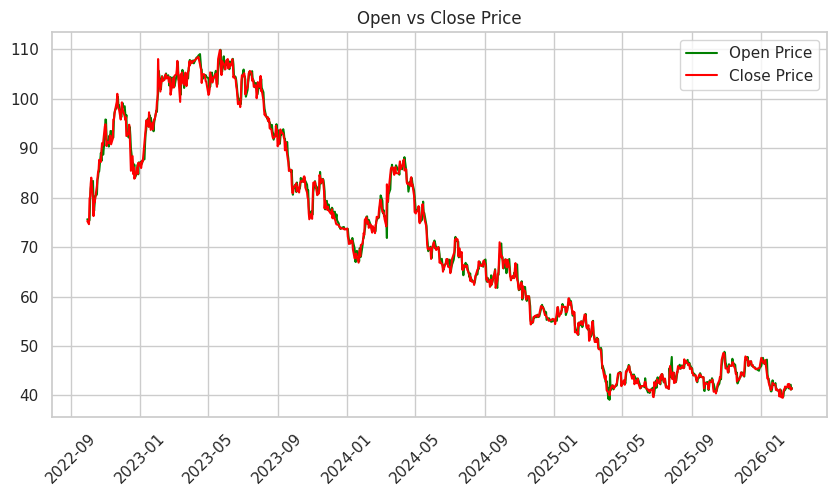

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['open'], label='Open Price', color='green')
plt.plot(df['date'], df['close'], label='Close Price', color='red')
plt.title("Open vs Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

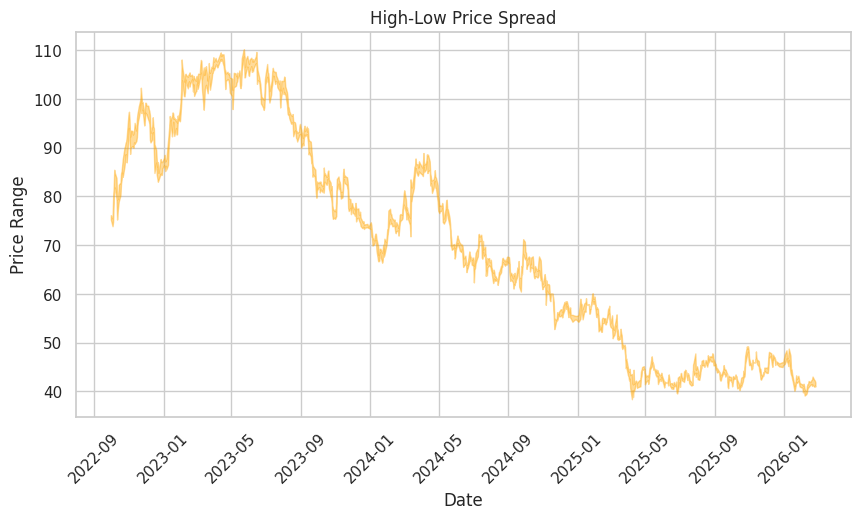

In [16]:
plt.figure(figsize=(10,5))
plt.fill_between(df['date'], df['low'], df['high'], 
                 color='orange', alpha=0.4)
plt.title("High-Low Price Spread")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.xticks(rotation=45)
plt.show()

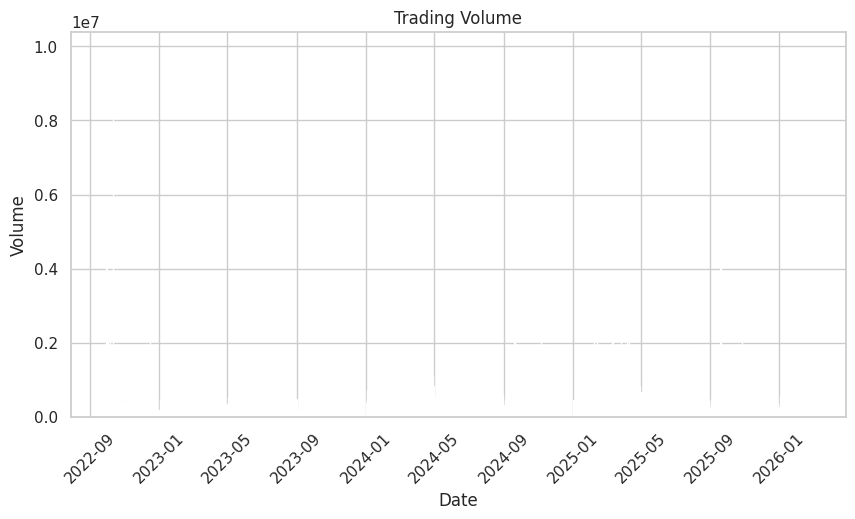

In [17]:
plt.figure(figsize=(10,5))
plt.bar(df['date'], df['volume'], color='purple')
plt.title("Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()

In [18]:
fig = go.Figure(data=[go.Candlestick(
    x=df['date'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.update_layout(
    title="Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price"
)

fig.show()

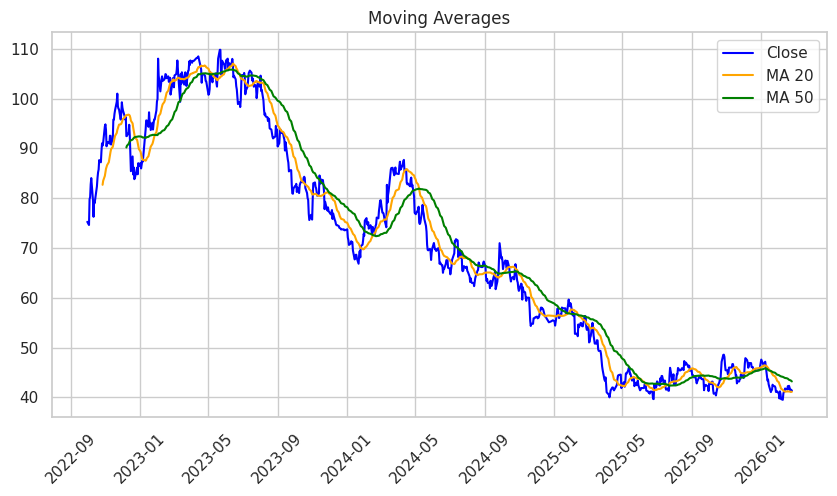

In [19]:
df['MA_20'] = df['close'].rolling(window=20).mean()
df['MA_50'] = df['close'].rolling(window=50).mean()

plt.figure(figsize=(10,5))
plt.plot(df['date'], df['close'], label='Close', color='blue')
plt.plot(df['date'], df['MA_20'], label='MA 20', color='orange')
plt.plot(df['date'], df['MA_50'], label='MA 50', color='green')

plt.title("Moving Averages")
plt.legend()
plt.xticks(rotation=45)
plt.show()

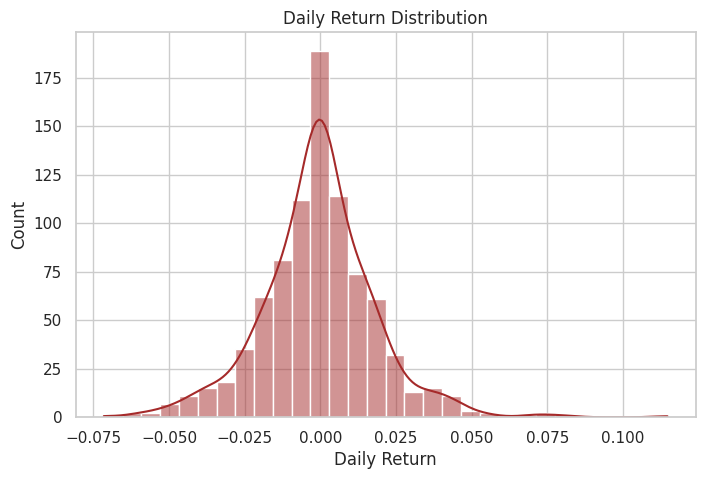

In [20]:
df['daily_return'] = df['close'].pct_change()

plt.figure(figsize=(8,5))
sns.histplot(df['daily_return'], bins=30, 
             kde=True, color='brown')

plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.show()

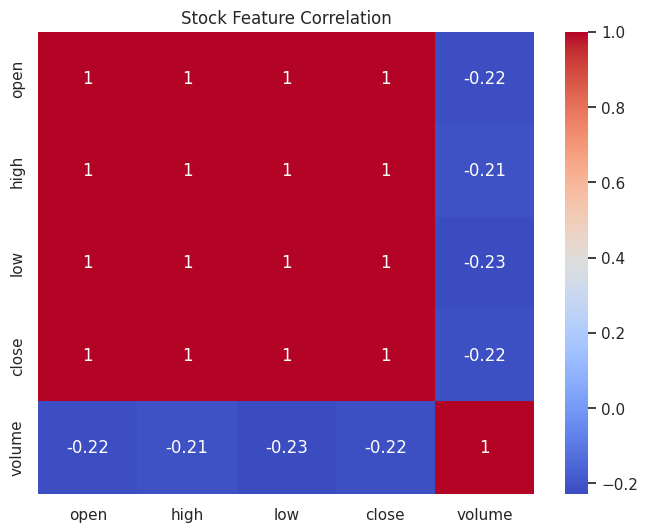

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['open','high','low','close','volume']].corr(),
            annot=True,
            cmap='coolwarm')

plt.title("Stock Feature Correlation")
plt.show()

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'], y=df['close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue')
))

fig.add_trace(go.Bar(
    x=df['date'], y=df['volume'],
    name='Volume',
    marker_color='purple',
    opacity=0.3,
    yaxis='y2'
))

fig.update_layout(
    title="Price and Volume Analysis",
    yaxis=dict(title='Price'),
    yaxis2=dict(title='Volume', overlaying='y', side='right')
)

fig.show()

## Feature engg

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [24]:
df['lag_1'] = df['close'].shift(1)
df['SMA_7'] = df['close'].rolling(window=7).mean().shift(1)

df = df.dropna()

In [25]:
X = df[['open', 'high', 'low', 'volume', 'lag_1', 'SMA_7']]
y = df['close']


In [26]:
split_idx = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [27]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

rf_pipeline = Pipeline([
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

In [28]:
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

lr_pred = lr_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

In [29]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

lr_mae, lr_rmse, lr_r2 = evaluate_model(y_test, lr_pred)
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, rf_pred)

In [30]:
print("\n--- Model Comparison ---")
print(f"Linear Regression -> MAE: {lr_mae:.4f}, RMSE: {lr_rmse:.4f}, R2: {lr_r2:.4f}")
print(f"Random Forest     -> MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}")

best_model_name = "Linear Regression" if lr_r2 > rf_r2 else "Random Forest"
best_score = max(lr_r2, rf_r2)

print(f"\nBest Model: {best_model_name} with R2 Score of {best_score:.4f}")


--- Model Comparison ---
Linear Regression -> MAE: 0.2457, RMSE: 0.3315, R2: 0.9747
Random Forest     -> MAE: 0.4295, RMSE: 0.5972, R2: 0.9178

Best Model: Linear Regression with R2 Score of 0.9747


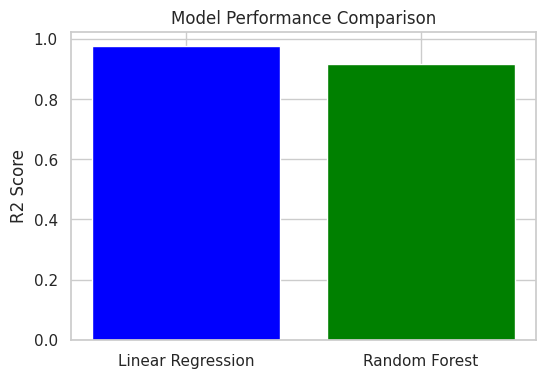

In [31]:
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_r2, rf_r2]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison")
plt.show()

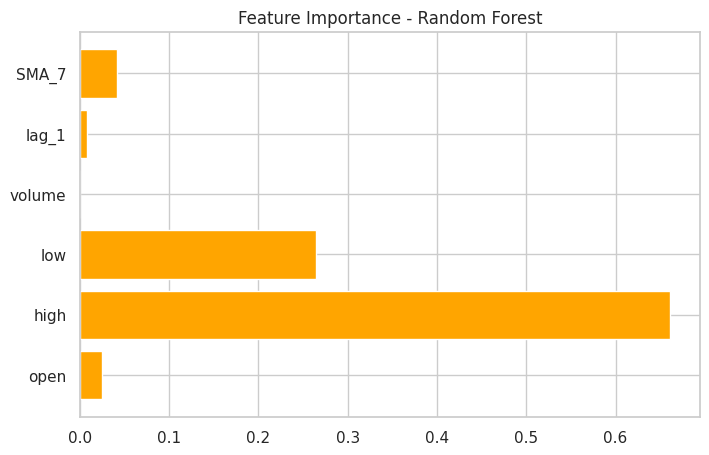

In [32]:
importances = rf_pipeline.named_steps['model'].feature_importances_

plt.figure(figsize=(8,5))
plt.barh(X.columns, importances, color='orange')
plt.title("Feature Importance - Random Forest")
plt.show()

## Thank you..pls upvote!!!!!!